# German Credit Card

In [1]:
import os
import numpy as np
#np.random.seed(1032)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns",18)

In [2]:
os.getcwd()

'C:\\Users\\bkolh\\OneDrive\\Desktop\\Priyanka\\2. Stats & ML\\July -23\\Lecture notes\\20-July-23 - Decision Tree\\21st July 2023'

In [3]:
credit_dt = pd.read_csv('German Credit Dataset.csv')

In [4]:
credit_dt.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


* DM - Deutsche Mark(currency of West Germany)
* By analyzing this dataset we should be able to know if the person is a credit defaulter or not. The "default" is a dependent variable and others are independet variables

In [5]:
credit_dt.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [6]:
credit_dt.shape

(1000, 17)

In [7]:
credit_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

### Data Cleaning

In [8]:
credit_df = credit_dt.copy()

In [9]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


> **Working on features checking_balance, savings_balance and employment_duration**

In [10]:
credit_df['checking_balance']. value_counts().index

Index(['unknown', '< 0 DM', '1 - 200 DM', '> 200 DM'], dtype='object')

In [11]:
# data_correction = ['checking_balance','savings_balance','employment_duration']
# def count_size():
#     dict = {}
#     for i in data_correction:
#         x = credit_df[i].value_counts().index.size
#         dict.update({i:x})
#     return(dict)

# #x = count_size()
# #print(x, type(x))

# for i in data_correction:
#     x = count_size()
#     if x[i]==4:
#         credit_df[i]=np.where(credit_df[i]== credit_df[i].value_counts().index[0], 0, 
#                           np.where(credit_df[i]== credit_df[i].value_counts().index[1], 1, 
#                           np.where(credit_df[i]== credit_df[i].value_counts().index[2],2,3)) )
#     elif x[i]==5:
#         credit_df[i]=np.where(credit_df[i]== credit_df[i].value_counts().index[0], 0, 
#                           np.where(credit_df[i]== credit_df[i].value_counts().index[1], 1, 
#                           np.where(credit_df[i]== credit_df[i].value_counts().index[2],2,
#                         np.where(credit_df[i]== credit_df[i].value_counts().index[3],3,4))) )
          

In [12]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [13]:
# for i in data_correction:
#     print("*******Original********\n")
#     print('-----', i,'-----', '\n', credit_dt[i].value_counts(),'\n')
#     print("*******Corrected********\n")
#     print('-----', i,'-----', '\n',credit_df[i].value_counts(),'\n')
    

Looking at above data we can conclude that the data replacement is correctly done


> **Working on feature "purpose"** 

* "furniture/appliances" will be replaced with "appliances"

In [14]:
credit_df['purpose'].value_counts()

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

In [15]:
# credit_df['purpose'] = np.where(credit_df['purpose']=='furniture/appliances','appliances',credit_df['purpose'])

In [16]:
credit_df['purpose'].value_counts()
# Changes are reflecting.

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

In [17]:
print(list(credit_dt.select_dtypes(include = 'object')))
print(len(list(credit_dt.select_dtypes(include = 'object'))))

['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone', 'default']
10


In [18]:
print(list(credit_df.select_dtypes(include = 'object')))
print(len(list(credit_df.select_dtypes(include = 'object'))))

['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone', 'default']
10


In [19]:
# before changes
credit_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [20]:
# #after changes
# credit_df.info()

> After the above changes in data actual numeric variables got converted into numeric from object such as variables 'checking_balance', 'savings_balance' and 'employment_duration' 

In [21]:
# credit_df.head()

### Checking Missing values

In [22]:
credit_df.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

> ***No missing values are present.***

### Checking Duplicates

In [23]:
credit_df.duplicated().sum()

0

In [24]:
credit_df[credit_df.duplicated()]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default


> ***There are no duplicate values.***

### Unique Variables

In [25]:
dict={}
for i in credit_df.columns:
        x = len(credit_df[i].unique())
        dict[i]=x
        #print(f'{i}:\n{x}\n\n')
cnt = pd.DataFrame(dict.items(), columns = ['features','unique_count']).sort_values(by ='unique_count', ignore_index = True) 
cnt

,features,unique_count
0,default,2
1,dependents,2
2,phone,2
3,housing,3
4,other_credit,3
5,job,4
6,existing_loans_count,4
7,checking_balance,4
8,percent_of_income,4
9,years_at_residence,4


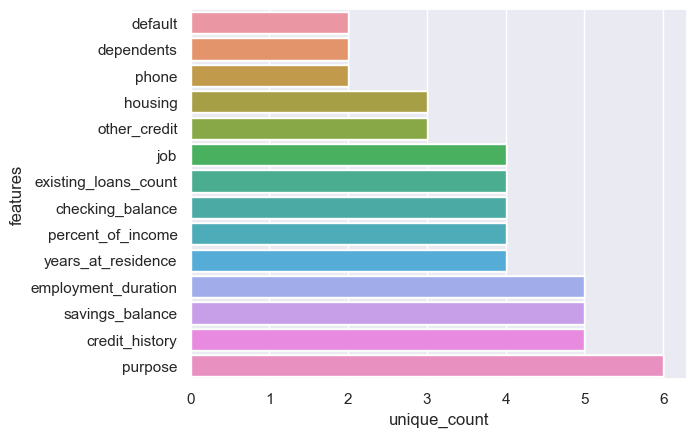

In [26]:
for i in credit_df.columns:

    if i not in ['months_loan_duration','age','amount']:
        sns.barplot(y= cnt['features'][:14], x = cnt['unique_count'][:14])
        #plt.xticks(rotation = 90)        

### Checking Outliers

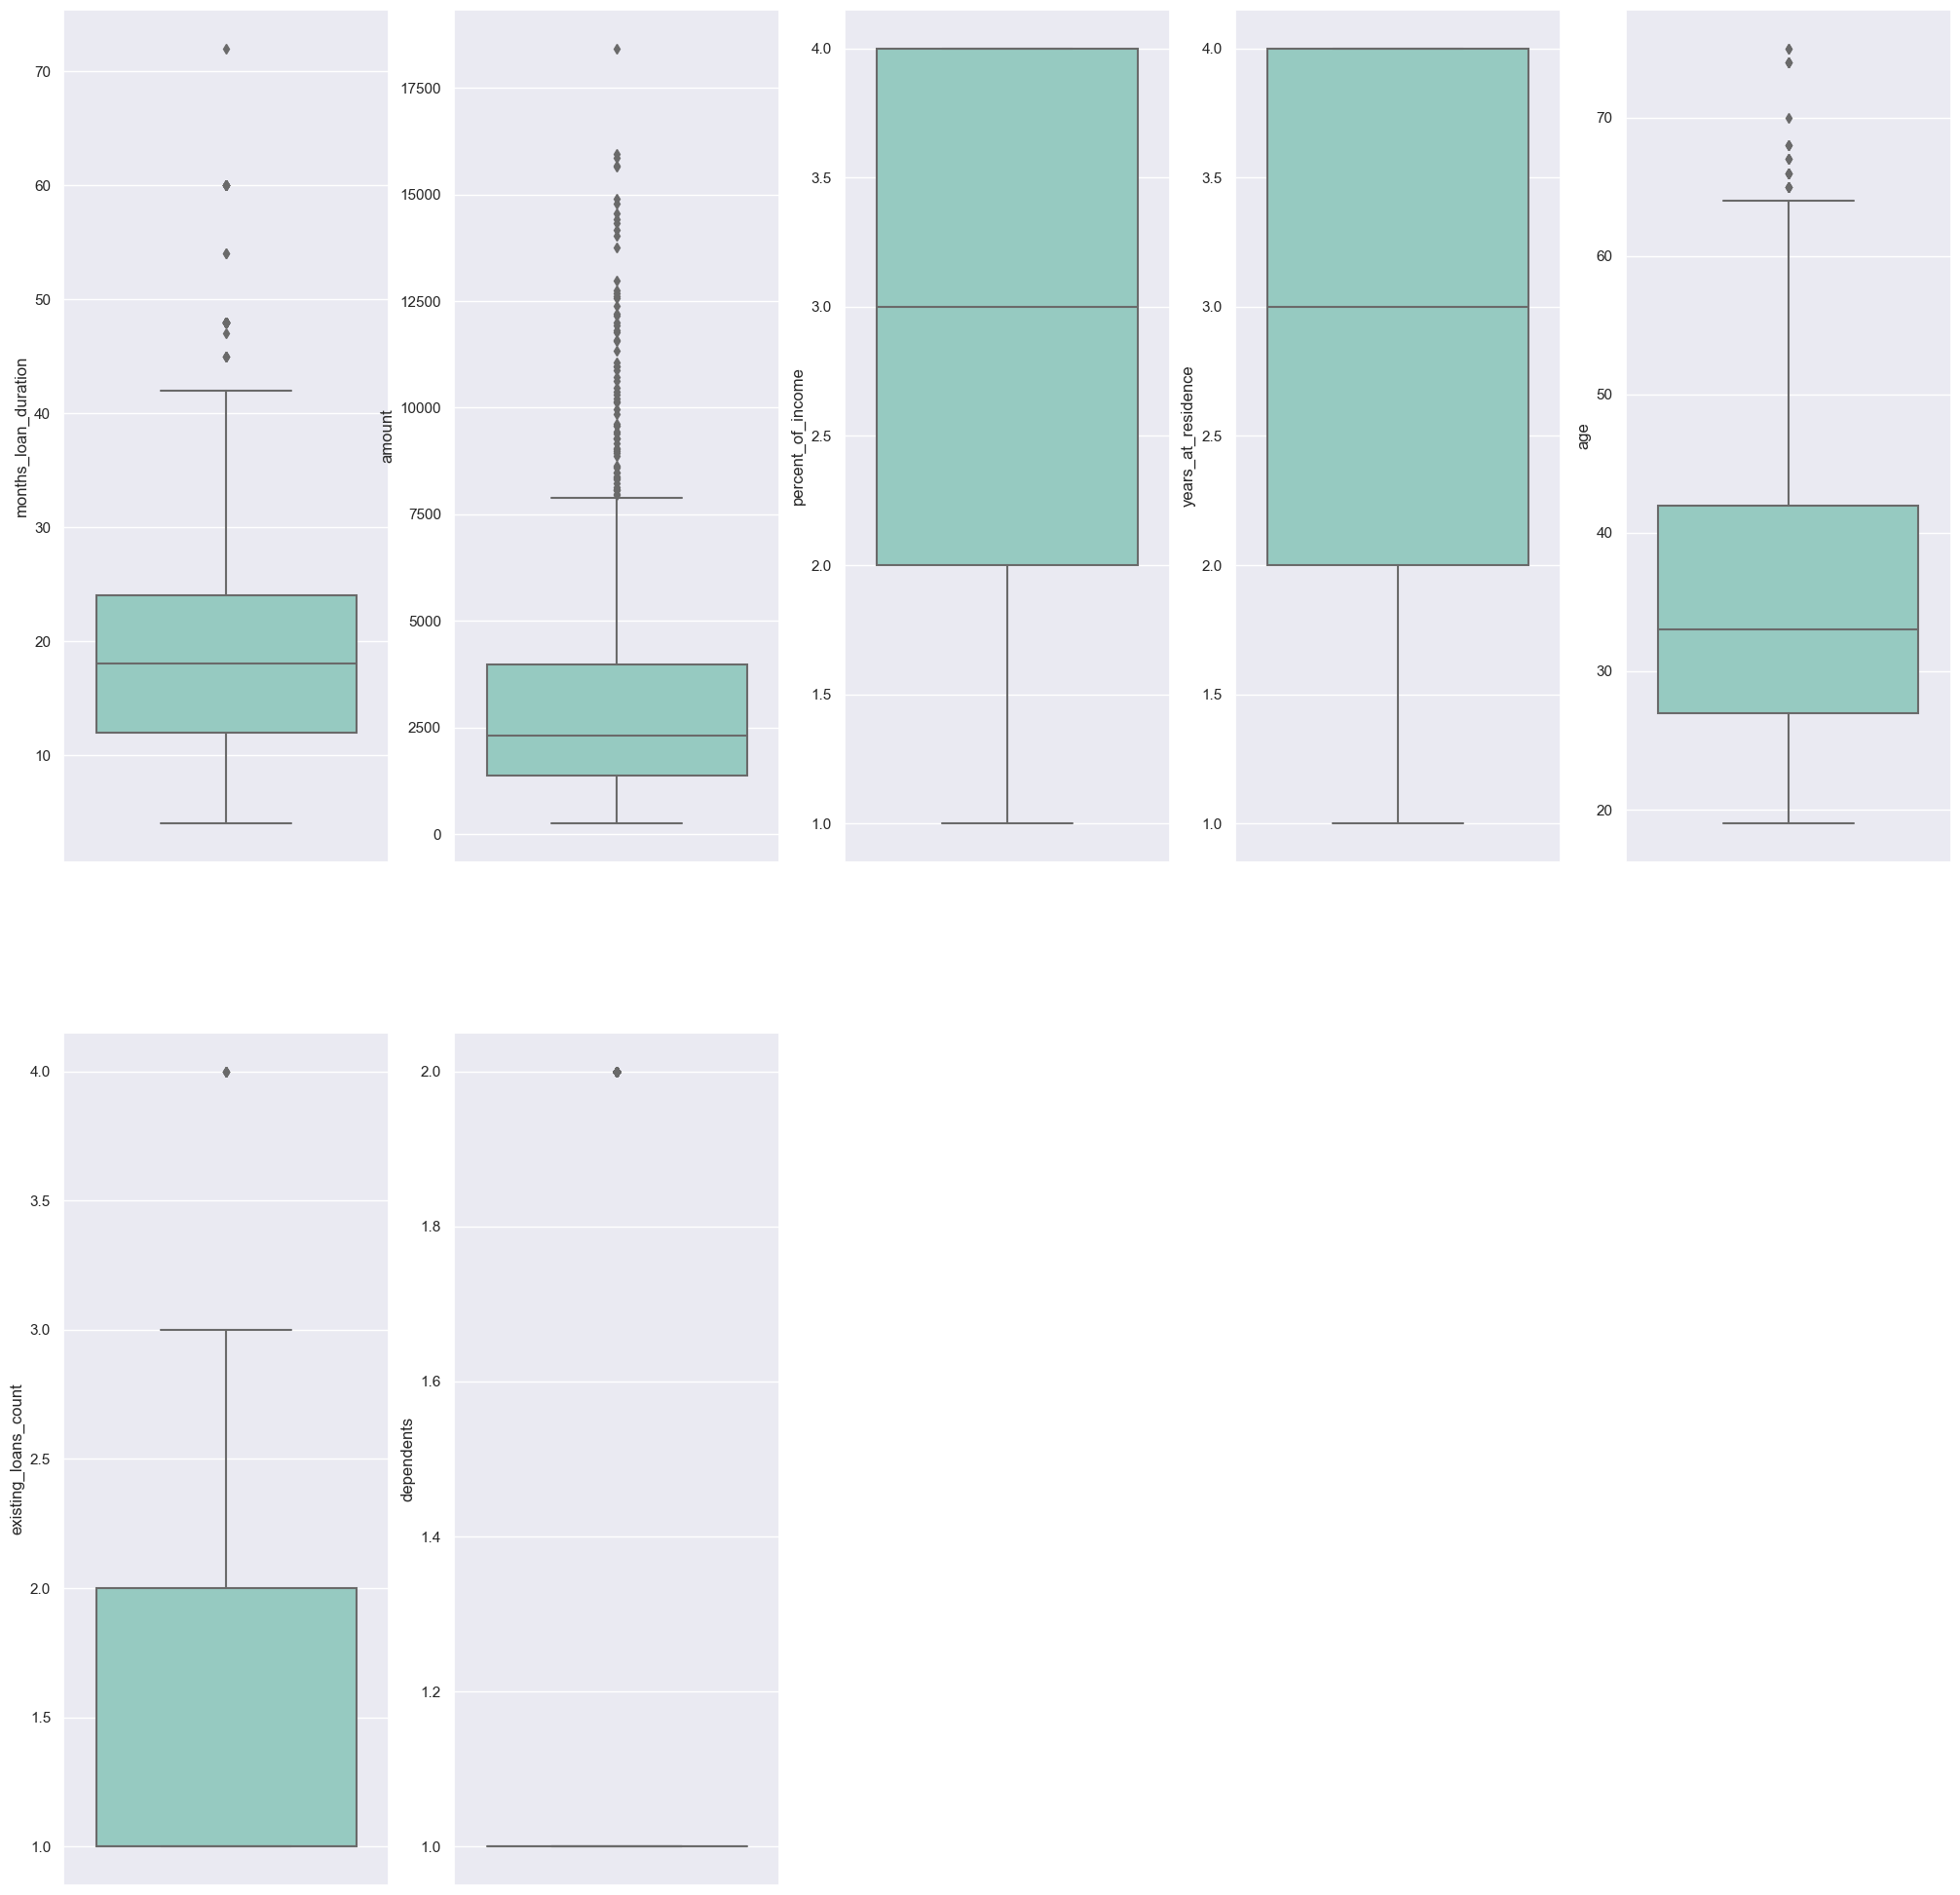

In [27]:
plt.figure(figsize = (25, 25), dpi = 100)

for x, col in enumerate(credit_df.select_dtypes(include = 'int').columns):
    plt.subplot(2,5,x + 1)
    sns.boxplot(y = credit_df[col], data=credit_df, palette = 'Set3')    

In [28]:
credit_df.describe().loc[['min','max', '25%', '75%']].T

,min,max,25%,75%
months_loan_duration,4.0,72.0,12.0,24.00
amount,250.0,18424.0,1365.5,3972.25
percent_of_income,1.0,4.0,2.0,4.00
years_at_residence,1.0,4.0,2.0,4.00
age,19.0,75.0,27.0,42.00
existing_loans_count,1.0,4.0,1.0,2.00
dependents,1.0,2.0,1.0,1.00


In [29]:
q1 = credit_df.quantile(0.25)
q3 = credit_df.quantile(0.75)
IQR = q3-q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

dict1 = {}
dict2 = {}
quant_list = []

dict1.update(upper_limit)
dict2.update(lower_limit)
quant_list.append(dict1)
quant_list.append(dict2)

limit = pd.DataFrame(quant_list).T
limit.columns = ['upper_limit', 'lower_limit']
limit

,upper_limit,lower_limit
months_loan_duration,42.000,-6.000
amount,7882.375,-2544.625
percent_of_income,7.000,-1.000
years_at_residence,7.000,-1.000
age,64.500,4.500
existing_loans_count,3.500,-0.500
dependents,1.000,1.000


### Handling Outliers

In [30]:
# outliers to be removed : amount, months loan duration > 50

In [31]:
#['months_loan_duration','amount','age','savings_balance','existing_loans_count','dependents']:
for i in ['amount']:
    credit_df[i].clip(upper = limit.loc[i][0] ,inplace=True)

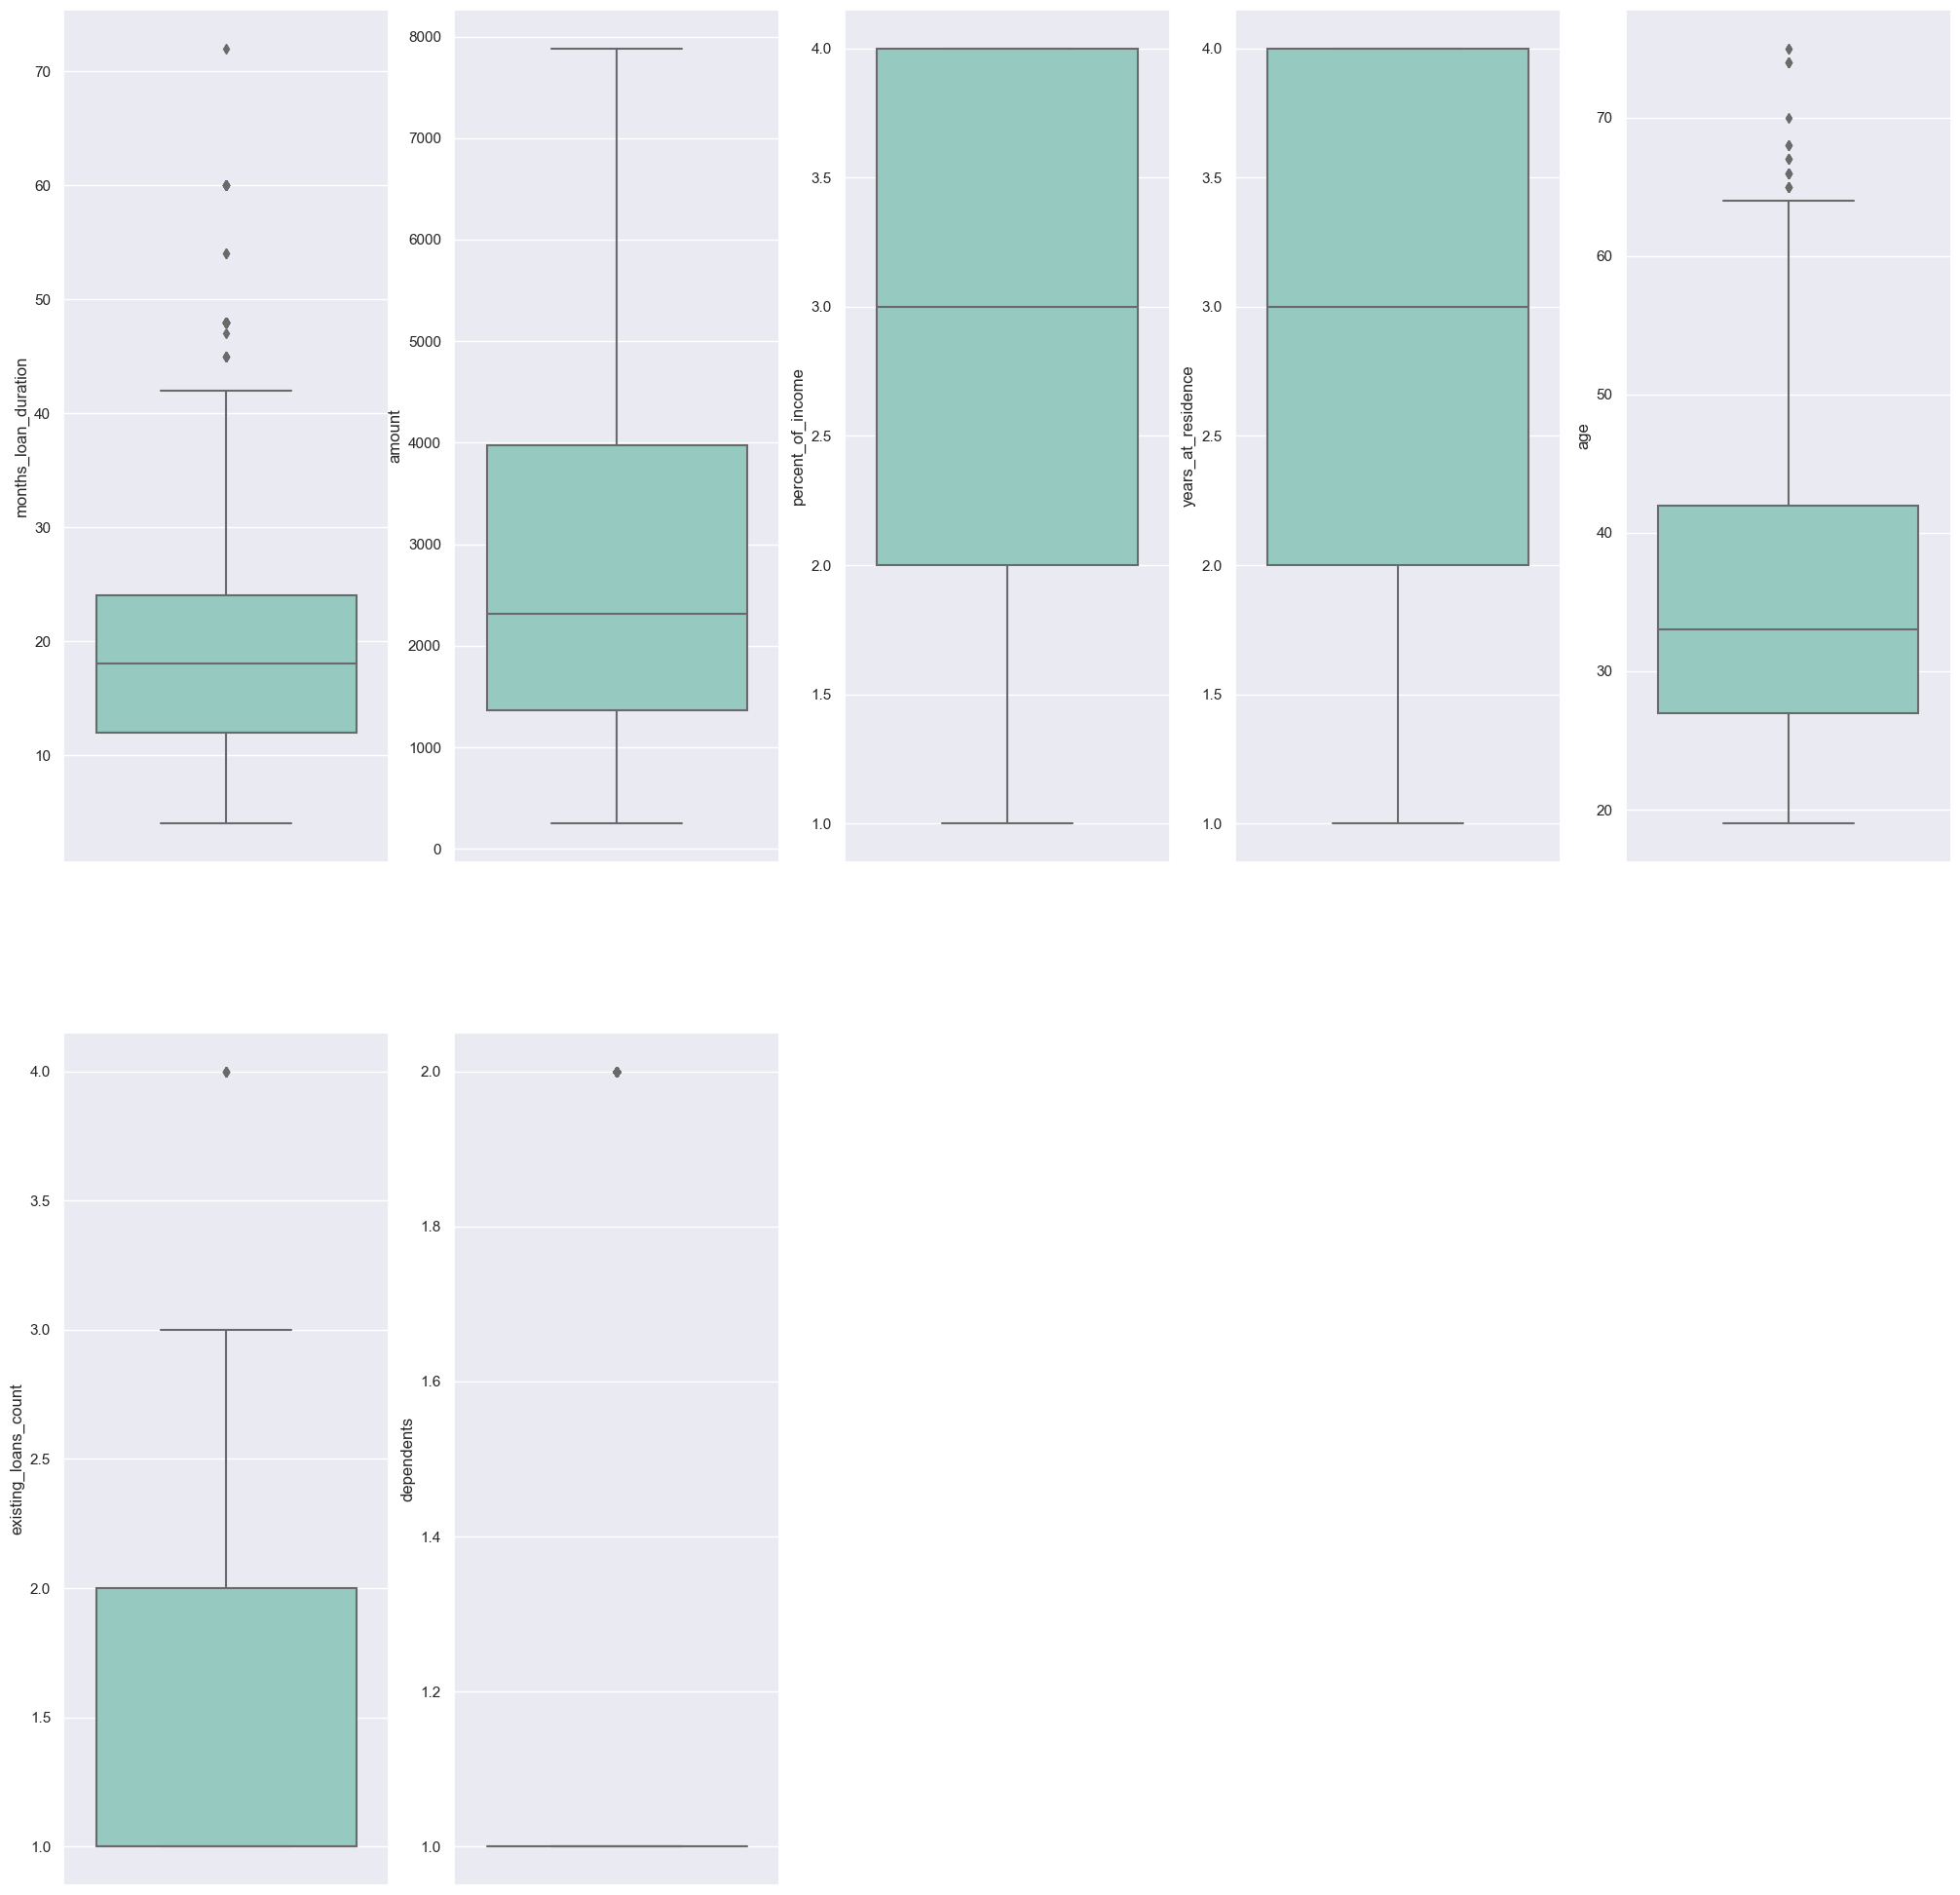

In [32]:
plt.figure(figsize = (25, 25), dpi = 100)

for x, col in enumerate(credit_df.select_dtypes(include = ['int','float']).columns):
    plt.subplot(2,5,x + 1)
    sns.boxplot(y = credit_df[col], data=credit_df, palette = 'Set3')    

<br>

### Dropping Variable

**Pre-Prunning**

In [33]:
credit_df.drop(['phone'], axis =1, inplace = True)

### Encoding

In [34]:
lst = ['credit_history','purpose','other_credit','housing','job']
for i in credit_dt.columns:
    if i not in ['months_loan_duration','age','amount']:
        print('='*20,i,'='*20)    
        print(credit_dt[i].value_counts(),'\n')

==================== checking_balance ====================
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64 

==================== credit_history ====================
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64 

==================== purpose ====================
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64 

==================== savings_balance ====================
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64 

==================== employment_duration ====================
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64 

===

**Categorical columns**
1. default
2. job 
3. housing 
4. other_credit 
5. - employment_duration 
6. - savings_balance 
7. purpose
8. credit_history 
9. - checking_balance 


In [35]:
credit_df1 = credit_df.copy()
credit_df1 = pd.get_dummies(credit_df1, columns=['default','job','housing','other_credit','purpose','credit_history'], drop_first = True )

In [36]:
credit_df1.head()

,checking_balance,months_loan_duration,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good
0,< 0 DM,6,1169.0,unknown,> 7 years,4,4,67,2,...,0,0,0,1,0,0,0,0,0
1,1 - 200 DM,48,5951.0,< 100 DM,1 - 4 years,2,2,22,1,...,0,0,0,1,0,1,0,0,0
2,unknown,12,2096.0,< 100 DM,4 - 7 years,2,3,49,1,...,0,0,1,0,0,0,0,0,0
3,< 0 DM,42,7882.0,< 100 DM,4 - 7 years,2,4,45,1,...,0,0,0,1,0,1,0,0,0
4,< 0 DM,24,4870.0,< 100 DM,1 - 4 years,3,4,53,2,...,1,0,0,0,0,0,0,1,0


In [37]:
pd.DataFrame(credit_df1.columns)

,0
0,checking_balance
1,months_loan_duration
2,amount
3,savings_balance
4,employment_duration
5,percent_of_income
6,years_at_residence
7,age
8,existing_loans_count
9,dependents


In [38]:
credit_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   checking_balance              1000 non-null   object 
 1   months_loan_duration          1000 non-null   int64  
 2   amount                        1000 non-null   float64
 3   savings_balance               1000 non-null   object 
 4   employment_duration           1000 non-null   object 
 5   percent_of_income             1000 non-null   int64  
 6   years_at_residence            1000 non-null   int64  
 7   age                           1000 non-null   int64  
 8   existing_loans_count          1000 non-null   int64  
 9   dependents                    1000 non-null   int64  
 10  default_yes                   1000 non-null   uint8  
 11  job_skilled                   1000 non-null   uint8  
 12  job_unemployed                1000 non-null   uint8  
 13  job_

In [39]:
credit_df1 = credit_df1.rename(columns = {'default_yes':'default'})

In [40]:
pd.DataFrame(credit_df1.columns)

,0
0,checking_balance
1,months_loan_duration
2,amount
3,savings_balance
4,employment_duration
5,percent_of_income
6,years_at_residence
7,age
8,existing_loans_count
9,dependents


<br>

### Seperate Indpendent And Dependent Variables

In [41]:
x = credit_df1.drop(['default'], axis=1)
y = credit_df1['default']

In [42]:
print(credit_df1.shape)
print(x.shape)
print(y.shape)
print(y.head())

(1000, 27)
(1000, 26)
(1000,)
0    0
1    1
2    0
3    0
4    1
Name: default, dtype: uint8


### Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
fsc = StandardScaler()
sc_x = fsc.fit_transform(x)
sc_x

ValueError: could not convert string to float: '< 0 DM'

<br>

### Imbalance Check

In [ ]:
sns.countplot(data=credit_df, x = y)
print('No has the count : ', y.value_counts()[0])
print('Yes has the count : ',y.value_counts()[1])
plt.show()

 
> ***This is the imbalance data. (300*2=600 < 700)***

### Handle Imbalance Data 

In [ ]:
# Oversampling method
import imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_sam, y_sam = over.fit_resample(sc_x,y)

In [ ]:
sns.countplot(data=credit_df, x = y_sam)
print('No has the count : ', y_over.value_counts()[0])
print('Yes has the count : ',y_over.value_counts()[1])
plt.show()

<br>

In [ ]:
plt.figure(figsize =(25,25), dpi = 200)
sns.heatmap(data = credit_df1.corr(), annot =True)
plt.show()

In [ ]:
# plt.figure(figsize=(50,50))
# sns.pairplot(data = credit_df1, hue = 'default')

<br>

### Splitting Test And Train Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sam, y_sam, test_size = 0.25, random_state =100, stratify=y_sam)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

<br>

### Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [ ]:

dict_model = {'Logestic Regression':LogisticRegression(),'Decision Tree': DecisionTreeClassifier(), 'Bagging': BaggingClassifier(), 'Random Forest':RandomForestClassifier()  }

def cross_validation(model):
    Training_CV = cross_val_score(model, x_train, y_train, cv =10).mean()
    Testing_CV = cross_val_score(model, x_test, y_test, cv= 10).mean()
    return Training_CV, Testing_CV

d = {}

for i in list(dict_model.keys()):
    #print('='*10,i,'='*10,'\n')
    mdl = dict_model[i]
    model = mdl.fit(x_train, y_train)
    #print(model,'\n')
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    train_acc = accuracy_score(y_train, y_predict_train)
    test_acc = accuracy_score(y_test, y_predict_test)
    d.setdefault(i,[]).append(train_acc)
    d.setdefault(i,[]).append(test_acc)
    x, y = cross_validation(model)
    d.setdefault(i,[]).append(x)
    d.setdefault(i,[]).append(y)
    acc_diff = abs(train_acc - test_acc)*100
    CV_acc_diff = abs(x - y)*100
    d.setdefault(i,[]).append(acc_diff)
    d.setdefault(i,[]).append(CV_acc_diff)

pd.DataFrame(d , index = ['Train Accuracy', 'Test Accuracy', 'CV Train Accuracy', 'CV Test Accuracy','acc_diff', 'CV_acc_diff'] ).T
    #print(f'Train accuracy score: {train_acc}\nTest accuracy score: {test_acc}\n\n')
    